In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read in csv file
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# =========================================================================================================
# choose the features based on correlations
game_info_df=game_info_df[['average', 'numwanting', 'siteviews', 'blogs', 'minage', 'news',
                           'podcast', 'totalvotes', 'numcomments', 'numgeeklists', 'weblink']].copy()
# =========================================================================================================
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['totalvotes'] ==0].index, inplace = True)
# drop the null rows
game_info_df.dropna(inplace=True)
game_info_df.head()

,average,numwanting,siteviews,blogs,minage,news,podcast,totalvotes,numcomments,numgeeklists,weblink
0,8.77503,1374,10583753,690,14,8,147,1171,8021,4649,40
1,8.60721,850,3385064,653,13,10,170,668,6552,3978,70
2,8.66981,1477,1816252,208,14,4,28,521,3303,1630,23
3,8.42870,2085,6059031,1473,12,16,163,1800,10034,7276,71
4,8.68957,979,2267902,99,14,3,53,335,2206,1010,23


In [2]:
game_info_df.tail()

,average,numwanting,siteviews,blogs,minage,news,podcast,totalvotes,numcomments,numgeeklists,weblink
29947,5.68000,2,11301,0,8,0,0,1,18,65,1
29948,5.50000,1,7097,0,12,0,0,1,4,5,0
29952,5.95000,2,5015,0,12,0,0,1,4,28,0
29981,7.00913,54,63706,11,8,0,0,6,252,121,14
29989,7.03571,1,6968,0,10,0,0,1,4,17,1


In [2]:
# Get the general idea about the dataset value range
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average,20138.0,6.434485,0.938374,1.0,5.86667,6.472555,7.058972,9.5
numwanting,20138.0,43.792879,121.608511,0.0,3.00000,9.000000,30.000000,2085.0
siteviews,20138.0,92644.494091,261624.524627,1431.0,14757.00000,29878.500000,72693.500000,10583753.0
blogs,20138.0,12.260701,45.139607,0.0,0.00000,2.000000,8.000000,1473.0
minage,20138.0,9.598073,3.710556,0.0,8.00000,10.000000,12.000000,25.0
news,20138.0,0.580197,1.396812,0.0,0.00000,0.000000,1.000000,37.0
podcast,20138.0,2.137899,8.391469,0.0,0.00000,0.000000,1.000000,588.0
totalvotes,20138.0,16.454067,66.393870,1.0,2.00000,3.000000,9.000000,2108.0
numcomments,20138.0,219.157364,676.344229,0.0,23.00000,53.000000,146.000000,18840.0
numgeeklists,20138.0,259.978101,1183.245497,0.0,24.00000,63.000000,195.000000,136869.0


## Select features, Create Train Test Split, Scale the data

In [3]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)

# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
X_scaled = X_scaler.transform(X)

X_scaled.shape, y.shape

((20138, 10), (20138,))

## RadiusNeighborsRegressor

In [4]:
from sklearn.neighbors import RadiusNeighborsRegressor
 # Create a radius neighbors regressor
rnr = RadiusNeighborsRegressor(radius=1.0)
rnr=rnr.fit(X_scaled, y)
print(f"Training Data Score: {rnr.score(X_scaled, y):.5f}")

Training Data Score: 0.00410


In [5]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'radius': [1,10,100]}

grid = GridSearchCV(rnr, param_grid, verbose=3)

# Train the model with GridSearch
grid.fit(X_scaled, y)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\pucke\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:421: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\pucke\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pucke\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\pucke\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\pucke\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\pucke\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 6

[CV 1/5] END ............................radius=1;, score=nan total time=   1.9s
[CV 2/5] END .........................radius=1;, score=-0.646 total time=   1.9s
[CV 3/5] END .........................radius=1;, score=-0.332 total time=   1.9s
[CV 4/5] END .........................radius=1;, score=-0.822 total time=   2.0s
[CV 5/5] END .........................radius=1;, score=-1.509 total time=   2.1s
[CV 1/5] END ........................radius=10;, score=-2.746 total time=   1.9s
[CV 2/5] END ........................radius=10;, score=-0.637 total time=   1.7s
[CV 3/5] END ........................radius=10;, score=-0.325 total time=   1.7s
[CV 4/5] END ........................radius=10;, score=-0.833 total time=   1.8s
[CV 5/5] END ........................radius=10;, score=-1.516 total time=   1.7s
[CV 1/5] END .......................radius=100;, score=-2.746 total time=   1.8s
[CV 2/5] END .......................radius=100;, score=-0.637 total time=   1.8s
[CV 3/5] END ...............

C:\Users\pucke\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan -1.21142496 -1.21142496]
  warnings.warn(


In [6]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

# get the model predictions
predictions = grid.predict(X_scaled)

print(f"Grid Best Explained Variance Score: {explained_variance_score(y, predictions):.5f}")
print(f"Grid Best R2 Score: {r2_score(y, predictions):.5f}")

Grid Best Explained Variance Score: 0.00000
Grid Best R2 Score: 0.00000


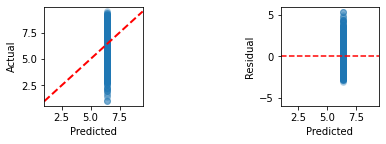

In [7]:
%matplotlib inline

fig = plt.figure()
#add subplots
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(233)
# Plot predictions vs actual values
ax1.scatter(predictions, y,alpha=0.2)
ax1.plot([y.min(), y.max()],[y.min(), y.max()],'--r', linewidth=2)
ax1.set_xlim([y.min(), y.max()])
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
# Plot Residuals
ax2.scatter(predictions, predictions - y,alpha=0.2)
ax2.hlines(y=0, xmin=y.min(), xmax=y.max(),colors="r", linestyles='dashed', )
ax2.set_xlim([y.min(), y.max()])
ax2.set_ylim([-6,6])
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Residual')
plt.show()

In [8]:
fig.savefig("rnr.svg", dpi=150)
fig.savefig("rnr.png", dpi=150)